In [28]:
import util
import hashlib
import time

import pandas as pd
import matplotlib.pyplot as plt

In [29]:
# define test vectors
long = 'a' * 1000
test_vectors = {
    1: 'abc',
    2: '',
    3: 'abcdbcdecdefdefgefghfghighijhijkijkljklmklmnlmnomnopnopq',
    4: 'abcdefghbcdefghicdefghijdefghijkefghijklfghijklmghijklmnhijklmnoijklmnopjklmnopqklmnopqrlmnopqrsmnopqrstnopqrstu',
    5: long
}

In [24]:
# verify implementation against hashlib on test vectors
for v in test_vectors:
    guess = util.SHA256(test_vectors[v])
    answer = hashlib.sha256(test_vectors[v].encode('utf-8')).hexdigest()
    if guess == answer:
        print(guess + ' verified')
    else:
        print(guess + ' incorrect')

ba7816bf8f01cfea414140de5dae2223b00361a396177a9cb410ff61f20015ad verified
e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b934ca495991b7852b855 verified
248d6a61d20638b8e5c026930c3e6039a33ce45964ff2167f6ecedd419db06c1 verified
cf5b16a778af8380036ce59e7b0492370b249b11e8f07a51afac45037afee9d1 verified
41edece42d63e8d9bf515a9ba6932e1c20cbc9f5a5d134645adb5db1b9737ea3 verified


In [25]:
# get hash times for my implementation for each test vector 
my_times = {}
for v in test_vectors:
    start = time.time()
    digest = util.SHA256(test_vectors[v])
    end = time.time()
    my_times[v] = end - start

In [26]:
# get hash times for hashlib's implementation for each test vector
lib_times = {}
for v in test_vectors:
    start = time.time()
    digest = hashlib.sha256(test_vectors[v].encode('utf-8')).hexdigest()
    end = time.time()
    lib_times[v] = end - start

In [27]:
df = pd.DataFrame([my_times, lib_times], index = ['my implementation', 'hashlib implementation'])
df

,1,2,3,4,5
my implementation,0.032583,0.028481,0.056934,0.055477,0.443433
hashlib implementation,0.000013,0.000002,0.000002,0.000002,0.000005


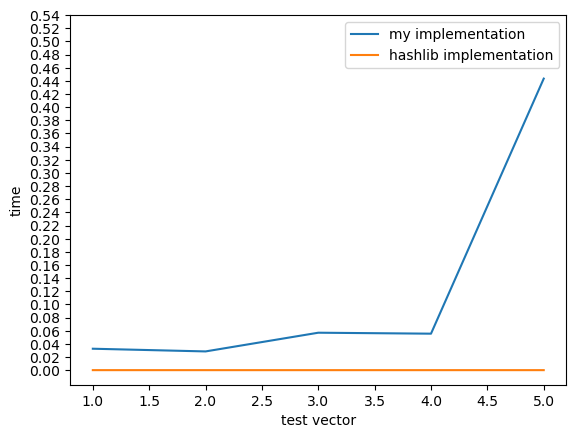

In [38]:
# plot times
df.transpose().plot()
plt.xlabel('test vector')
plt.ylabel('time')
plt.yticks([.02 * i for i in range(28)])
plt.show()